In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("TMDB_movie_dataset_v11.csv")
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [4]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

## Cleaning Data

Dropping columns that are not very interesting

In [5]:
df.drop(columns=['id', 'backdrop_path', 'poster_path', 'tagline', 'overview', 'homepage', 'imdb_id'], inplace=True)
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


Dropping NA

In [6]:
df = df.dropna()

Changing release date to release year. It's more relevant

In [7]:
df['release_date'] = df['release_date'].apply(lambda x: int(x.split('-')[0]))
df.rename(columns={'release_date':'release_year'}, inplace=True)

Just want to know about the already released movies

In [8]:
df = df.loc[df['status'] == 'Released']

In [9]:
df['release_year'].describe()

count    290551.000000
mean       1993.097756
std          28.923674
min        1887.000000
25%        1975.000000
50%        2005.000000
75%        2017.000000
max        2025.000000
Name: release_year, dtype: float64

Multiplied vote average to 100, so the vote average and vote count can appear in the same graph

In [10]:
df['vote_average*100'] = df['vote_average'].apply(lambda x: x*100)

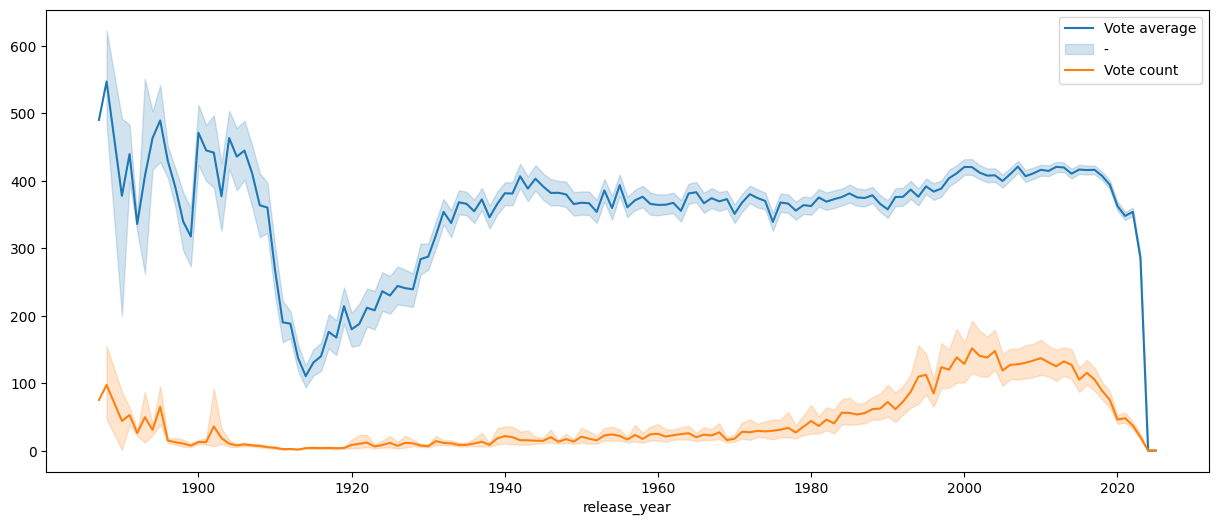

In [27]:
plt.figure(figsize=(15,6))

ax = sns.lineplot(data= df, x='release_year', y='vote_average*100')
aax = sns.lineplot(data= df, x='release_year', y='vote_count')

plt.legend(['Vote average', '-' , 'Vote count'])

plt.ylabel('')

plt.show()

An interesting cut on the dataframe would be the movie from 1990 to 2020, that are movies with high number of votes and high average score. And another nice cut would be from 1910 and below, analysing the behave of the curves about those movies could be very interesting.

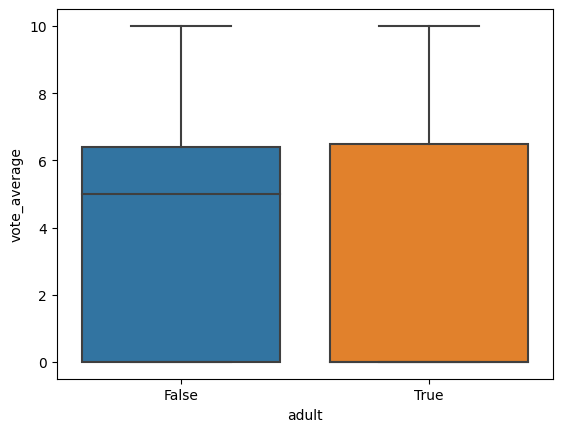

In [12]:
ax = sns.boxplot(data= df, x= 'adult', y='vote_average')

plt.show()

In [24]:
adult = df.loc[df['adult'] == True]
notadult = df.loc[df['adult'] == False]


In [25]:
adult['vote_average'].describe()

count    6188.000000
mean        2.845841
std         3.727062
min         0.000000
25%         0.000000
50%         0.000000
75%         6.500000
max        10.000000
Name: vote_average, dtype: float64

In [26]:
notadult['vote_average'].describe()

count    284363.000000
mean          3.804191
std           3.158198
min           0.000000
25%           0.000000
50%           5.000000
75%           6.400000
max          10.000000
Name: vote_average, dtype: float64

We can see that movies not tagged Adult have a greter mean on vote average than movies tagged Adult. Maybe try to understand why?

## Analysing Old Movies (-1910)

In [46]:
old = df.loc[(df['release_year'] <= 1910)]
old.head()

,title,vote_average,vote_count,status,release_year,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,vote_average*100
2669,A Trip to the Moon,7.900,1580,Released,1902,0,15,False,5985,fr,Le Voyage dans la Lune,17.886,"Adventure, Science Fiction",Star-Film,France,No Language,790.0
6039,The Great Train Robbery,7.000,547,Released,1903,0,12,False,150,en,The Great Train Robbery,10.511,"Crime, Action, Western",Edison Studios,United States of America,No Language,700.0
7188,The Arrival of a Train at La Ciotat,7.112,425,Released,1897,0,1,False,0,fr,L'arrivée d'un train à La Ciotat,10.495,Documentary,Lumière,France,No Language,711.2
9027,Workers Leaving the Lumière Factory,6.685,297,Released,1895,0,1,False,0,fr,La Sortie de l'Usine Lumière à Lyon,9.641,Documentary,Lumière,France,No Language,668.5
10870,The Sprinkler Sprinkled,6.896,225,Released,1895,0,1,False,0,fr,Arroseur et arrosé,6.428,Comedy,"Lumière, Société des Etablissements L. Gaumont",France,No Language,689.6


In [29]:
old['vote_average'].describe()

count    1705.000000
mean        3.883165
std         2.245008
min         0.000000
25%         3.188000
50%         4.700000
75%         5.314000
max        10.000000
Name: vote_average, dtype: float64

## Analysing Recent Movies (1990 - 2020)

In [13]:
recent = df.loc[(df['release_year'] >= 1990) & (df['release_year']<= 2020)]
recent.head()

,title,vote_average,vote_count,status,release_year,revenue,runtime,adult,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,vote_average*100
0,Inception,8.364,34495,Released,2010,825532764,148,False,160000000,en,Inception,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",836.4
1,Interstellar,8.417,32571,Released,2014,701729206,169,False,165000000,en,Interstellar,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,841.7
2,The Dark Knight,8.512,30619,Released,2008,1004558444,152,False,185000000,en,The Dark Knight,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",851.2
3,Avatar,7.573,29815,Released,2009,2923706026,162,False,237000000,en,Avatar,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",757.3
4,The Avengers,7.710,29166,Released,2012,1518815515,143,False,220000000,en,The Avengers,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",771.0
